In [26]:
import pyscf, numpy, scipy
from pyscf import gto, scf, ao2mo
from pyscf.lib import logger

def WaterCluster(n=64, basis="ccpvdz", verbose=4):
    atom = ""
    with open("./64h2o.xyz", "r") as f:
        lines = f.readlines()
        atom = "".join(lines[2:(2+3*n)])

    mol = gto.Mole()
    mol.atom = atom
    mol.basis = basis
    mol.max_memory=4000
    mol.verbose = verbose
    mol.build()

    return mol

def plot(n):
    m = WaterCluster(n=n, basis="sto3g", verbose=0)
    m.max_memory = 16000

    from pyscf.dft import Grids
    from pyscf.dft.numint import NumInt
    ni   = NumInt()
    grid = Grids(m)
    grid.atom_grid = {"O": (19, 50), "H": (11, 50)}
    grid.prune = None
    grid.build()

    xao = numpy.einsum("Ru,R->Ru", ni.eval_ao(m, grid.coords), grid.weights ** 0.5)
    rho = numpy.einsum("Ru,Rv->Ruv", xao, xao)
    nao = rho.shape[1]
    ng = rho.shape[0]

    nsp = numpy.sum(numpy.abs(rho) > 1e-6)
    print("n= % 4d, nao = % 4d, nsp= % 6.4e / %6.4e, % 6.4e" % (n, nao, nsp, rho.size, nsp / ng))

    nsps = [numpy.sum(numpy.abs(rho[g]) > 1e-6) for g in range(ng)]

    import matplotlib
    from matplotlib import pyplot
    fig, axs = pyplot.subplots(2, 1)

    ax = axs[0]
    ax.plot(numpy.asarray(nsps))

    ax = axs[1]
    ax.plot(numpy.sort(nsps))
        

n=   16, nao =  112, nsp=  1.0616e+06 / 4.1144e+08,  3.2365e+01


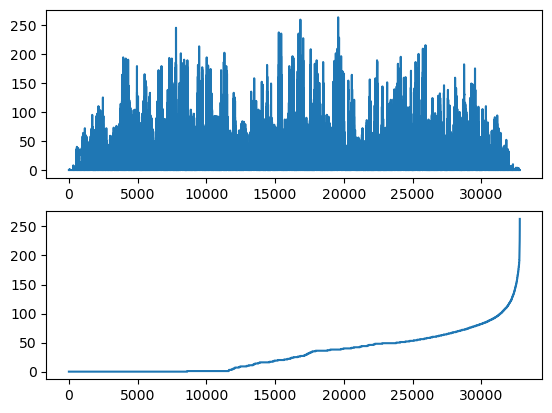

In [27]:
plot(16)

n=    8, nao =   56, nsp=  4.9444e+05 / 5.1430e+07,  3.0149e+01


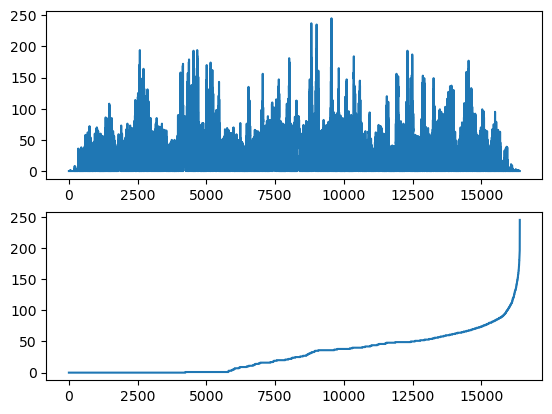

In [28]:
plot(8)